In [1]:
import matplotlib.pyplot as plt
import numpy as np



512 384


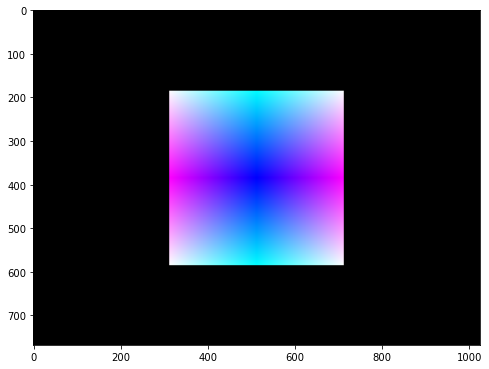

In [48]:
class Canvas:
    """canvas class"""
    
    def __init__(self, width=256, height=256):
        self.width = width
        self.height = height
        self.center_x = self.width // 2
        self.center_y = self.height // 2
        self.buffer = np.zeros((self.height, self.width, 3), dtype=np.uint8) # 8-bit depth
        
    def Clear(self):
        """clear the display buffer"""
        self.buffer = np.zeros((self.height, self.width, 3), dtype=np.uint8)
    
    def PutPixel(self, x, y, color):
        """
        set the pixel color of (x,y)
        Note that: the center of canvas is the origin of coordinate system
        """
        # convert to the array coordinate system
        x_ = self.center_x + x
        y_ = self.center_y - y
        
        # convert floating-point color to integer if needed
        if type(color[0]) is float:
            color = np.array(color).clip(0, 1.0)
            color = np.array(color * 255, dtype=np.uint8)
        else:
            color = np.array(color, dtype=np.uint8).clip(0, 255)
        
        # set the pixel color
        if x_ >= 0 and x_ < self.width and y_ >= 0 and y_ < self.height:
            self.buffer[y_, x_] = color


# Test the canvas            
canvas = Canvas(width=1024, height=768)
print(canvas.center_x, canvas.center_y)

# Draw a rectangle
canvas.Clear()
for i in range(-200, 200):
    for j in range(-200, 200):
        canvas.PutPixel(x=i, y=j, color=(abs(0.005*i),abs(0.005*j),1.0))
        

plt.figure(figsize=(8,8))
plt.imshow(canvas.buffer)
